# MNIST

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from emnist import extract_test_samples
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os

- Load data

In [16]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

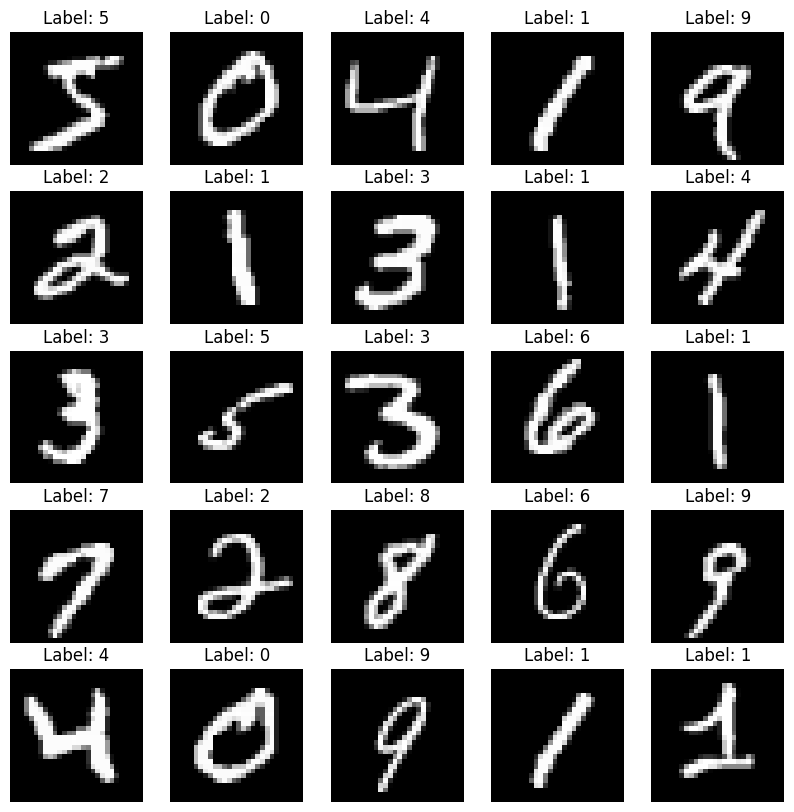

In [17]:
# Display some random images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [18]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- Build and train CNN

In [19]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='PReLU', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='PReLU'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model on the MNIST dataset
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5


750/750 [==============================] - 25s 32ms/step - loss: 1.0373 - accuracy: 0.9232 - val_loss: 0.1849 - val_accuracy: 0.9634
Epoch 2/5
750/750 [==============================] - 23s 30ms/step - loss: 0.1180 - accuracy: 0.9728 - val_loss: 0.1344 - val_accuracy: 0.9698
Epoch 3/5
750/750 [==============================] - 23s 30ms/step - loss: 0.0752 - accuracy: 0.9798 - val_loss: 0.1261 - val_accuracy: 0.9736
Epoch 4/5
750/750 [==============================] - 23s 30ms/step - loss: 0.0618 - accuracy: 0.9829 - val_loss: 0.1602 - val_accuracy: 0.9673
Epoch 5/5
750/750 [==============================] - 23s 30ms/step - loss: 0.0549 - accuracy: 0.9845 - val_loss: 0.1475 - val_accuracy: 0.9717


- Model evaluation on MNIST data

In [22]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

  8/313 [..............................] - ETA: 2s - loss: 0.1848 - accuracy: 0.9688

313/313 [==============================] - 2s 6ms/step - loss: 0.1398 - accuracy: 0.9714
Test accuracy: 0.9714000225067139


In [23]:
test_label_predict = model.predict(test_images)
test_label_predict = tf.argmax(test_label_predict, axis=1).numpy()

313/313 [==============================] - 2s 6ms/step


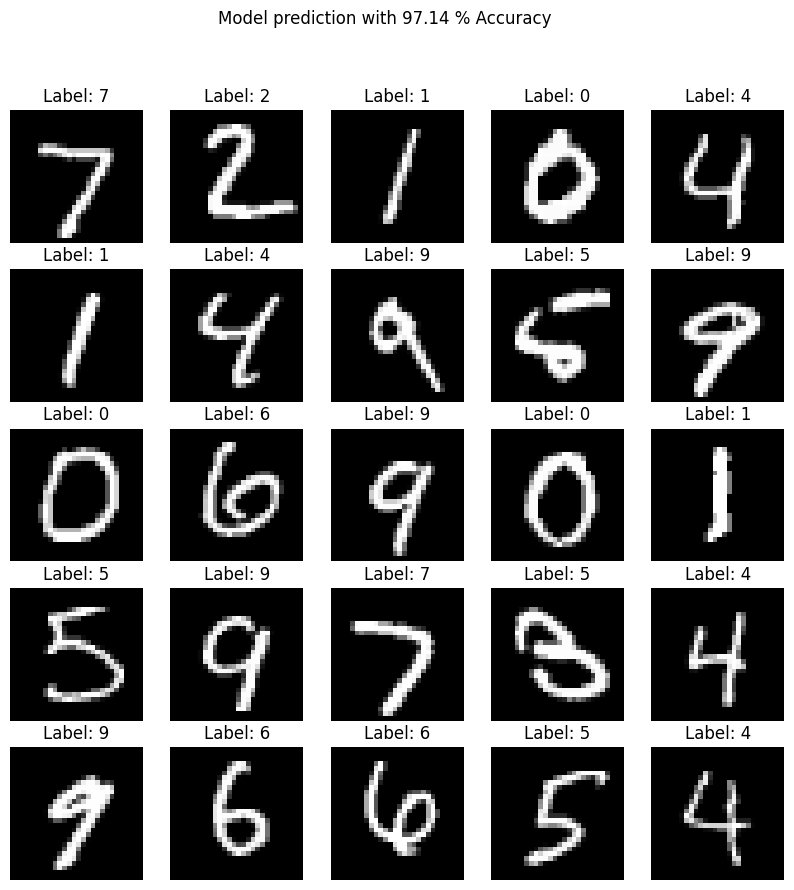

In [24]:
# Display some random images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Label: {test_label_predict[i]}")
    plt.axis('off')
    plt.suptitle('Model prediction with {} % Accuracy'.format(round((test_acc*100),2)))
plt.show()

- Saving trained model

In [26]:
model_json = model.to_json()
# Check if directory exists
if os.path.isdir('saved_model') == False:
    os.mkdir('saved_model')     
# Saving model to JSON
with open("saved_model/MNIST_trained.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("saved_model/MNIST_trained_weights.h5","w")